![](https://images.pexels.com/photos/148806/pexels-photo-148806.jpeg?cs=srgb&dl=white-and-black-sun-bear-148806.jpg&fm=jpg)

# Pandas Basics

Kevin J. Walchko, Phd

8 Feb 2020
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>

---

In [1]:
import pandas as pd
import numpy as np

## Basics

Simple example

In [96]:
cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Price': [22000,25000,27000,35000]
        }

df = pd.DataFrame(cars, columns= ['Brand', 'Price'])
df.head()

,Brand,Price
0,Honda Civic,22000
1,Toyota Corolla,25000
2,Ford Focus,27000
3,Audi A4,35000


In [97]:
df.describe()

,Price
count,4.000000
mean,27250.000000
std,5560.275773
min,22000.000000
25%,24250.000000
50%,26000.000000
75%,29000.000000
max,35000.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Brand   4 non-null      object
 1   Price   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


## Dictionaries

In [99]:
# sometimes it is useful to put this into a dictionary
df.to_dict()

{'Brand': {0: 'Honda Civic',
  1: 'Toyota Corolla',
  2: 'Ford Focus',
  3: 'Audi A4'},
 'Price': {0: 22000, 1: 25000, 2: 27000, 3: 35000}}

## Sampled Data Points

In most engineering applications, we capture data as *object oriented* data frames (packets, etc) that contain all of the information at that moment in time (when it was sampled). The example doesn't arrange the data that way. But that is ok, we can fix it.

In [133]:
# collect data, each sample has the information we need. You
# can think of the data as: sample 0: bob is 33, sample 1: bobby is 43 ...
#
# ok, now imagin we are taking sensor readings, it is more along
# the thinking of that.
data = {
    0: {'name': "pos", "x": 33, "y":10},
    1: {'name': "pos", "x": 43, "y":20},
    2: {'name': "pos", "x": 38, "y":15},
    3: {'name': "vel", "x": 33.9, "y":10},
    4: {'name': "vel", "x": 33.5, "y":20},
    5: {'name': "vel", "x": 38.0, "y":15}
}
# data = {
#     "pos": [{"x": 33, "y":10},{"x": 43, "y":20},{"x": 38, "y":15}],
#     "vel": [{"x": 33, "y":10},{"x": 43, "y":20},{"x": 38, "y":15}]
# }

df = pd.DataFrame(data) # import object oriented data, wrong order
df = df.transpose()     # re-order the data to work for pandas
df.head()               # markdown table of data

,name,x,y
0,pos,33,10
1,pos,43,20
2,pos,38,15
3,vel,33.9,10
4,vel,33.5,20


In [134]:
df.describe()

,name,x,y
count,6,6.0,6
unique,2,5.0,3
top,pos,38.0,15
freq,3,2.0,2


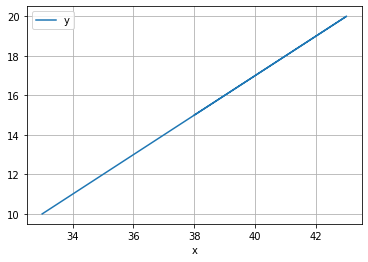

In [135]:
pos = df[df["name"] == "pos"]
pos.plot(x="x", y="y", grid=True);

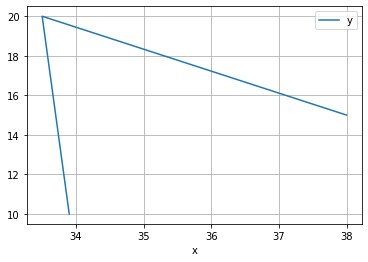

In [139]:
vel = df[df["name"] == "vel"]
vel.plot(x="x", y="y", grid=True);

## Saving Data

You can save a `pandas` data frame as a `csv` or `pickle` file

In [102]:
df.to_pickle("data.pickle")       # save to a file
n = pd.read_pickle("data.pickle") # read back in
n.head()

,name,age
0,bob,33
1,bobby,43
2,big bob,53


In [103]:
df == n

,name,age
0,True,True
1,True,True
2,True,True


In [104]:
df.to_csv("data.csv", index=False) # save to a file
m = pd.read_csv("data.csv")        # read back in
m.head()

,name,age
0,bob,33
1,bobby,43
2,big bob,53


## Filtering DataFrames

In [105]:
df = pd.DataFrame(
    {
        'legs': [2, 4, 8, 0, 4, 4, 4],
        'wings': [2, 0, 0, 0, 0, 0, 2],
        'seen': [10, 2, 1, 8, 5, 0, 0]
    },
    index=['falcon', 'dog', 'spider', 'fish', 'horse','unicorn', 'pegasus'])

In [106]:
# filter and only look at "legs" and "wings"
n = df[["legs", "wings"]]
n.head()

,legs,wings
falcon,2,2
dog,4,0
spider,8,0
fish,0,0
horse,4,0


In [107]:
# show animals with more than 2 legs
df[df["legs"] > 2]

,legs,wings,seen
dog,4,0,2
spider,8,0,1
horse,4,0,5
unicorn,4,0,0
pegasus,4,2,0


In [110]:
# only 4 legged animals and limit to non-mythical animals (those I have seen)
df[(df["legs"] == 4) & (df["seen"] > 0)]

,legs,wings,seen
dog,4,0,2
horse,4,0,5


In [111]:
# show only the first 3 rows
df[:3]

,legs,wings,seen
falcon,2,2,10
dog,4,0,2
spider,8,0,1


In [112]:
# or the last
df[-1:]

,legs,wings,seen
pegasus,4,2,0


## Sampling Data Frames

In [113]:
# extract 2 random sample, will change each time you run this cell.
# df['legs'].sample(n=2, random_state=1) will set the radom seed and 
# always give you the same answer
df.sample(n=2)

,legs,wings,seen
dog,4,0,2
fish,0,0,8


In [114]:
# you can limit it to just "legs"
df['legs'].sample(n=2)

falcon    2
dog       4
Name: legs, dtype: int64

In [115]:
# or a 50% sample with replacement
df['legs'].sample(frac=0.5, replace=True)

dog        4
dog        4
unicorn    4
horse      4
Name: legs, dtype: int64

In [116]:
# or up sample to 150%
df['legs'].sample(frac=1.5, replace=True)

unicorn    4
pegasus    4
pegasus    4
horse      4
pegasus    4
horse      4
fish       0
pegasus    4
fish       0
horse      4
Name: legs, dtype: int64

## Manipulating the DataFrames

There are a couple ways to do this, here is some interesting ones:

In [117]:
# original data
df.head()

,legs,wings,seen
falcon,2,2,10
dog,4,0,2
spider,8,0,1
fish,0,0,8
horse,4,0,5


In [118]:
def func(row):
    return (row.legs - row.wings)/2

In [119]:
df.apply(func, axis=1)

falcon     0.0
dog        2.0
spider     4.0
fish       0.0
horse      2.0
unicorn    2.0
pegasus    1.0
dtype: float64

In [120]:
# if you want, you can add it into the dataframe
df["metric"] = df.apply(func, axis=1)
df.head()

,legs,wings,seen,metric
falcon,2,2,10,0.0
dog,4,0,2,2.0
spider,8,0,1,4.0
fish,0,0,8,0.0
horse,4,0,5,2.0


In [121]:
# Or you can do it this way, which *might* be better
# and more straight forward
n = (df.legs - df.wings)/2
n.head()

falcon    0.0
dog       2.0
spider    4.0
fish      0.0
horse     2.0
dtype: float64